## Problem Statement

Here we have a data set of `10,000` customers of a particular bank. The target variable is `Exited` which is binary- 1 if the customer leaves, 0 otherwise. There are a bunch of features as well- `gender, age, location, credit score, estimated salary` etc.

The objective is to figure out the important features which are responsible for the churn variable. We will build a **logistic regression model** for the same.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\CourseProjects\ML\Customer-Churn-Records.csv')

In [3]:
df.shape

(10000, 18)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [6]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [8]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


In [11]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

## Exploratory Data Analysis & Visualization

In [12]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [13]:
import seaborn as sns


### Correlation Matrix

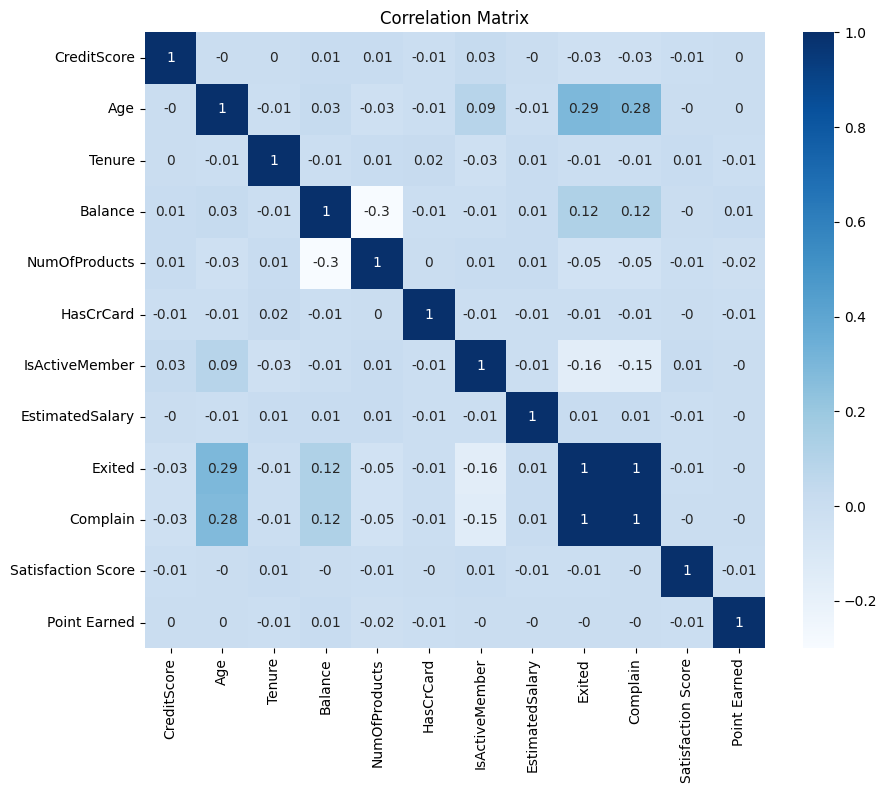

In [14]:
corr = df.corr(numeric_only = True).round(2)
plt.figure(figsize = (10, 8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot = True, cmap = 'Blues', cbar = True)
plt.show()

In [15]:
corr['Exited'].sort_values(ascending = False)

Exited                1.00
Complain              1.00
Age                   0.29
Balance               0.12
EstimatedSalary       0.01
Point Earned         -0.00
HasCrCard            -0.01
Tenure               -0.01
Satisfaction Score   -0.01
CreditScore          -0.03
NumOfProducts        -0.05
IsActiveMember       -0.16
Name: Exited, dtype: float64

<Axes: >

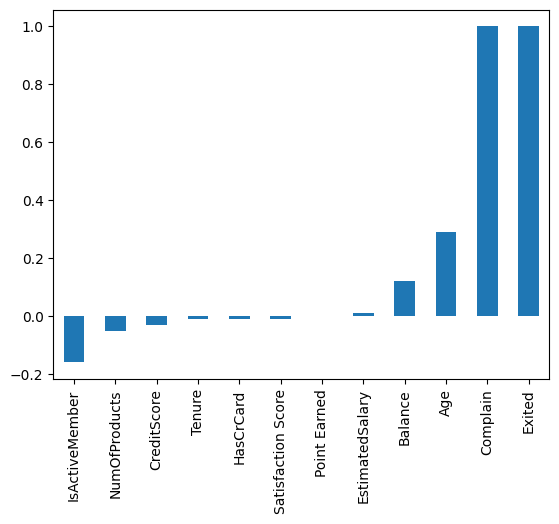

In [16]:
corr['Exited'].sort_values().plot(kind = 'bar')

### Churn as Target Variable

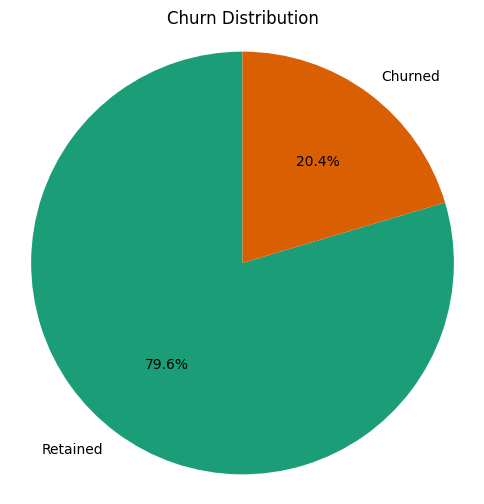

In [17]:
labels = ['Retained', 'Churned']
plt.figure(figsize = (6, 6))
plt.pie(x = df['Exited'].value_counts(), labels = labels, colors = plt.cm.Dark2.colors, autopct = '%1.1f%%', startangle = 90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

### Churn by Gender

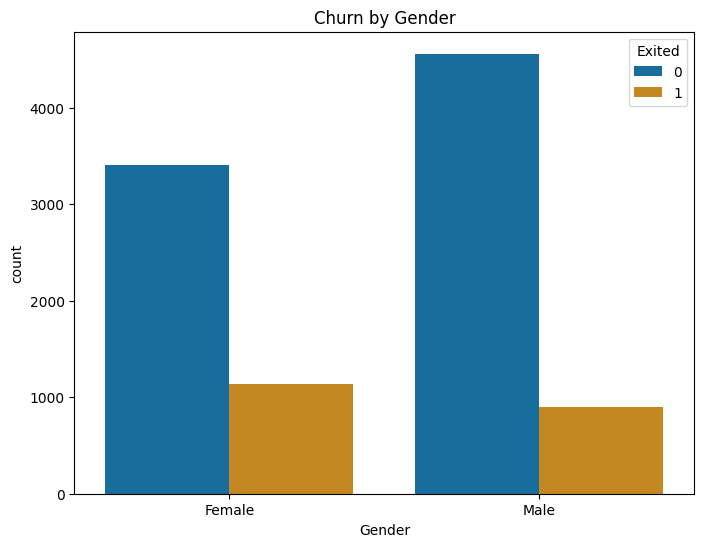

In [18]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'Gender', hue = 'Exited',  palette = 'colorblind')
plt.title('Churn by Gender')
plt.show()

In [19]:
churn_rate_gender = df.groupby('Gender')['Exited'].mean() * 100
print(churn_rate_gender)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


### Churn by Geography

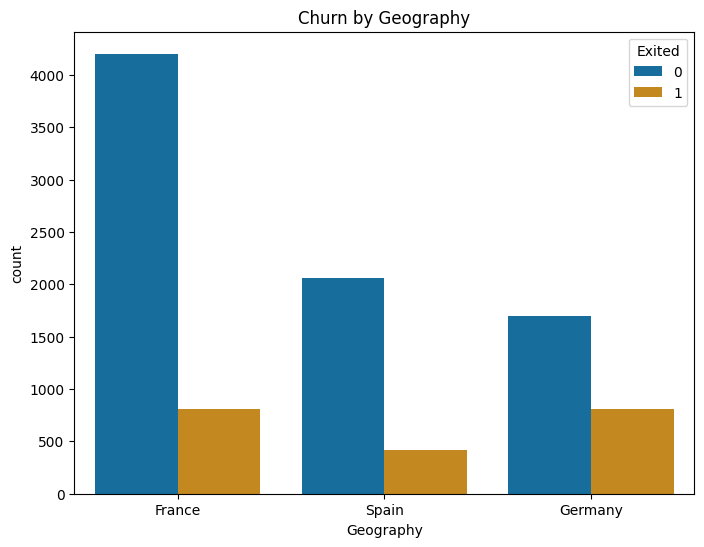

In [20]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'Geography', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Geography')
plt.show()

In [21]:
churn_rate_geography = df.groupby('Geography')['Exited'].mean() * 100
print(churn_rate_geography)

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


### Churn by AgeGroup

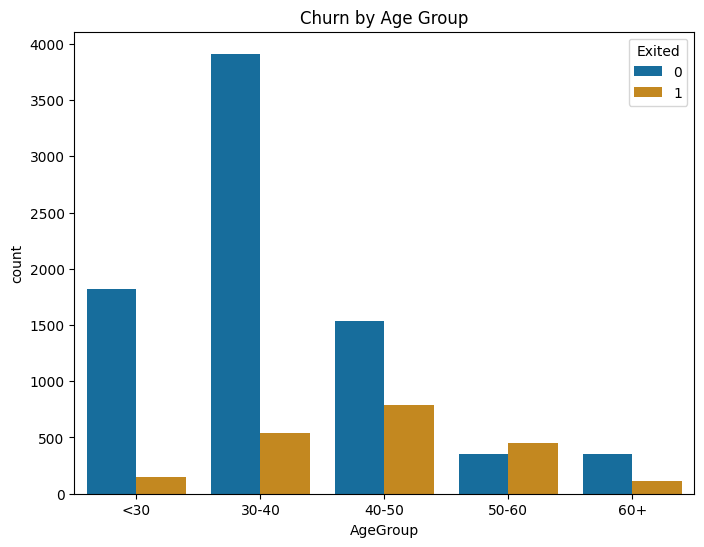

In [22]:
df['AgeGroup'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, np.inf], labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8, 6))
plt.title('Churn by Age Group')
sns.countplot(data = df, x = 'AgeGroup', hue = 'Exited', palette = 'colorblind')
plt.show()

In [23]:
churn_rate_age = df.groupby('AgeGroup')['Exited'].mean() * 100
print(churn_rate_age) 

AgeGroup
<30       7.520325
30-40    12.109638
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64


In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50


### Churn by Number of Products

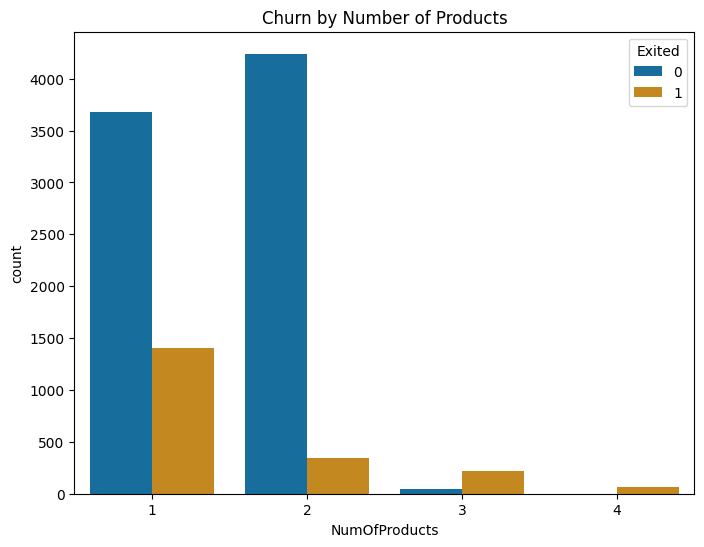

In [25]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'NumOfProducts', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Number of Products')
plt.show()

In [26]:
churn_rate_products = df.groupby('NumOfProducts')['Exited'].mean() * 100
print(churn_rate_products)

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


### Churn vs. Credit Card

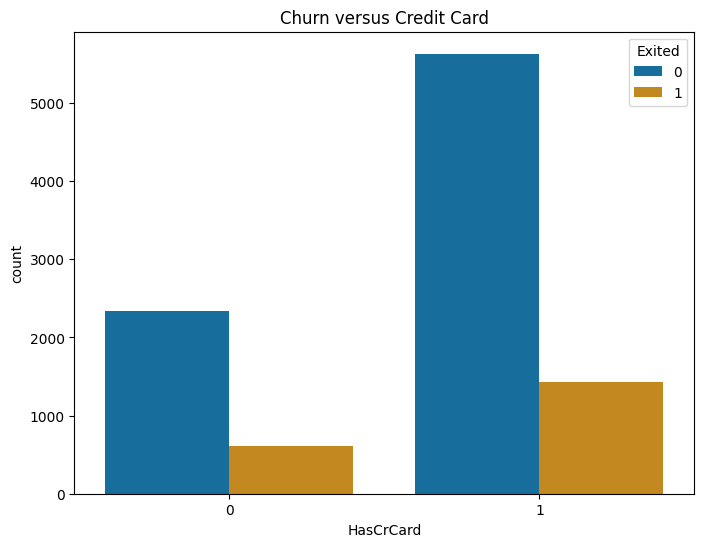

In [27]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'HasCrCard', hue = 'Exited', palette = 'colorblind')
plt.title('Churn versus Credit Card')
plt.show()

In [28]:
churn_rate_card = df.groupby('HasCrCard')['Exited'].mean() * 100
print(churn_rate_card)

HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64


### Churn by Member Activity Status

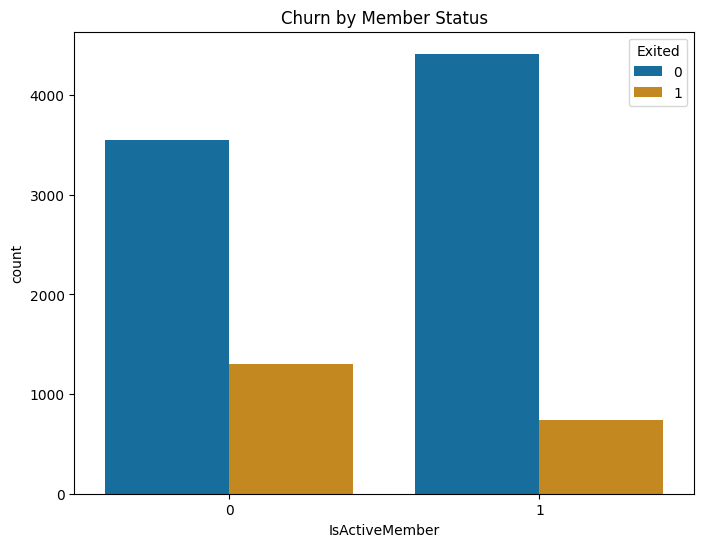

In [29]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'IsActiveMember', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Member Status')
plt.show()

In [30]:
churn_rate_active_status = df.groupby('IsActiveMember')['Exited'].mean() * 100
print(churn_rate_active_status)

IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


### Churn by Tenure

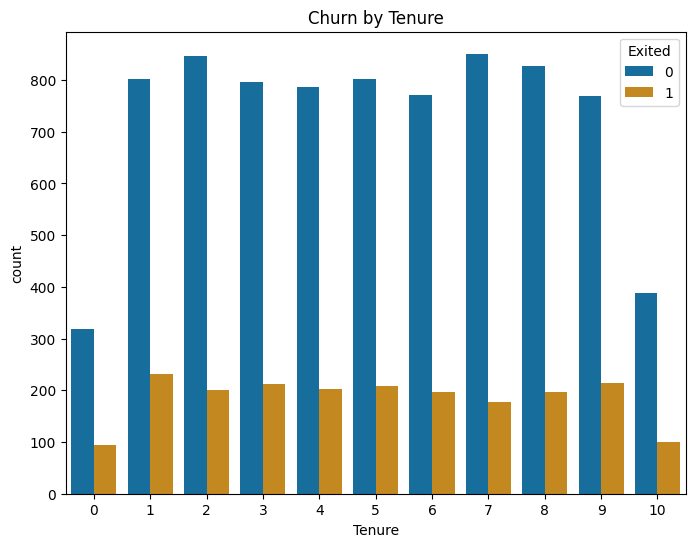

In [31]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'Tenure', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Tenure')
plt.show()

In [32]:
churn_rate_tenure = df.groupby('Tenure')['Exited'].mean() * 100
print(churn_rate_tenure)

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


### Credit Score

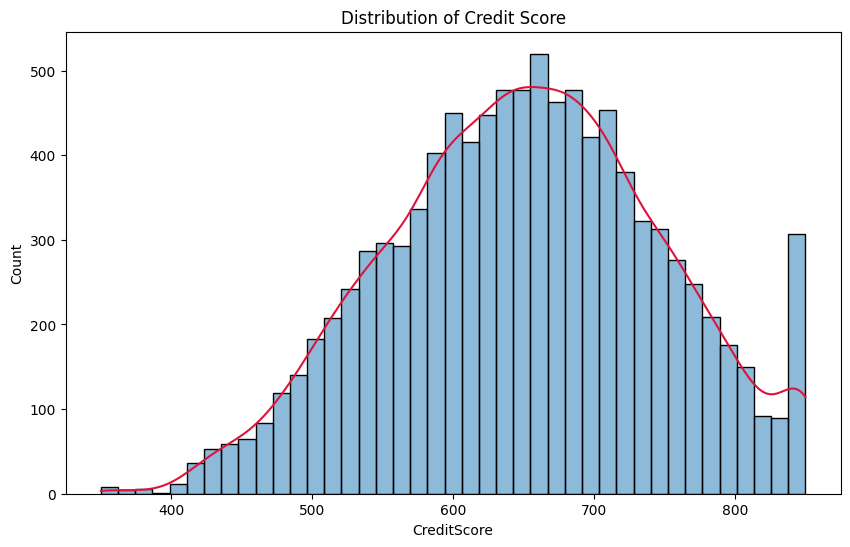

In [33]:
plt.figure(figsize = (10, 6))
plt.title('Distribution of Credit Score')
ax = sns.histplot(data = df, x = 'CreditScore', palette = 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show()

### Balance

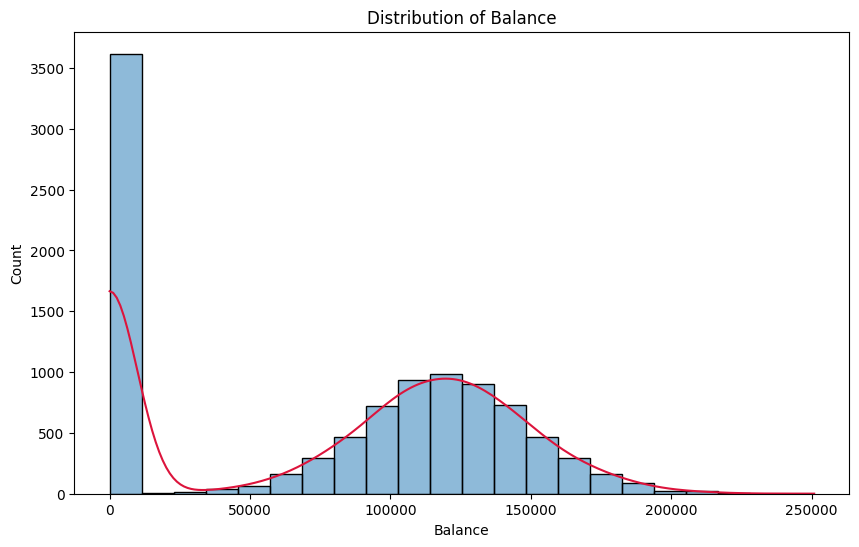

In [34]:
plt.figure(figsize = (10, 6))
plt.title('Distribution of Balance')
ax = sns.histplot(data = df, x = 'Balance', palette = 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show()

### EstimatedSalary

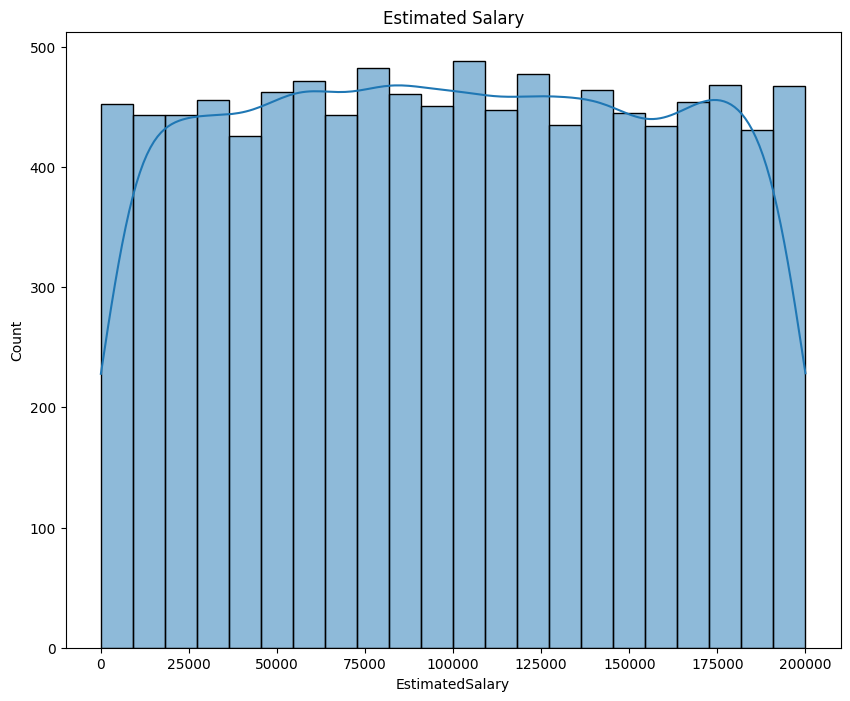

In [35]:
plt.figure(figsize = (10, 8))
plt.title('Estimated Salary')
sns.histplot(data = df, x = 'EstimatedSalary', palette = 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show()

## Data Preprocessing

In [36]:
df.dtypes

CreditScore              int64
Geography               object
Gender                  object
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Exited                   int64
Complain                 int64
Satisfaction Score       int64
Card Type               object
Point Earned             int64
AgeGroup              category
dtype: object

In [37]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
7479,567,Spain,Male,35,8,153137.74,1,1,0,88659.07,0,0,2,PLATINUM,549,30-40
7331,797,Spain,Male,59,4,129321.44,1,1,1,93624.55,0,0,3,GOLD,245,50-60
617,612,Germany,Female,62,8,140745.33,1,1,0,193437.89,1,1,5,GOLD,455,60+
6264,690,Germany,Male,44,9,100368.63,2,0,0,35342.33,0,0,3,DIAMOND,652,40-50
7945,759,France,Female,45,8,0.00,2,1,1,99251.24,0,0,1,DIAMOND,292,40-50


In [38]:
df1 = pd.get_dummies(df, columns = ['Geography', 'Gender', 'Card Type'], dtype = int)

In [39]:
df1.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,AgeGroup,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
8427,753,40,0,3768.69,2,1,0,177065.24,1,1,...,30-40,1,0,0,1,0,0,0,1,0
9255,847,41,3,101543.51,4,1,0,16025.17,1,1,...,40-50,0,1,0,1,0,0,0,1,0
4099,696,34,9,150856.79,1,0,1,8236.78,0,0,...,30-40,1,0,0,0,1,0,1,0,0
1024,718,25,4,108691.95,1,1,0,63030.97,0,0,...,<30,1,0,0,1,0,1,0,0,0
5094,610,37,0,0.00,1,1,0,114514.64,0,0,...,30-40,1,0,0,0,1,0,0,1,0


In [40]:
df.shape

(10000, 16)

In [41]:
df1.shape

(10000, 22)

In [42]:
df2 = df1.drop(['Complain', 'AgeGroup'], axis = 1)

In [43]:
df2.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9245,681,41,0,120549.29,2,1,0,175722.31,0,5,257,1,0,0,1,0,0,0,0,1
1976,598,38,6,0.00,2,0,0,173783.38,0,4,897,0,0,1,1,0,0,0,1,0
7275,669,42,9,0.00,2,0,0,135630.32,0,2,526,1,0,0,1,0,0,0,1,0
7602,691,29,9,116536.43,1,1,0,51987.99,0,1,592,1,0,0,1,0,1,0,0,0
7413,850,31,4,164672.66,1,0,1,61936.10,0,1,519,0,1,0,1,0,0,0,1,0


In [44]:
df2.shape

(10000, 20)

## Train Test Split

In [45]:
X = df2.drop('Exited', axis = 1)
y = df2['Exited']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Feature Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model - Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg_model = LogisticRegression()

In [53]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
predictions = logreg_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))

## Model Evaluation

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [56]:
print('Accuracy Score: ')
accuracy_score(y_test, predictions)

Accuracy Score: 


0.812

In [57]:
print('Classification Report')
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [58]:
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))

Confusion Matrix: 
 [[1547   60]
 [ 316   77]]


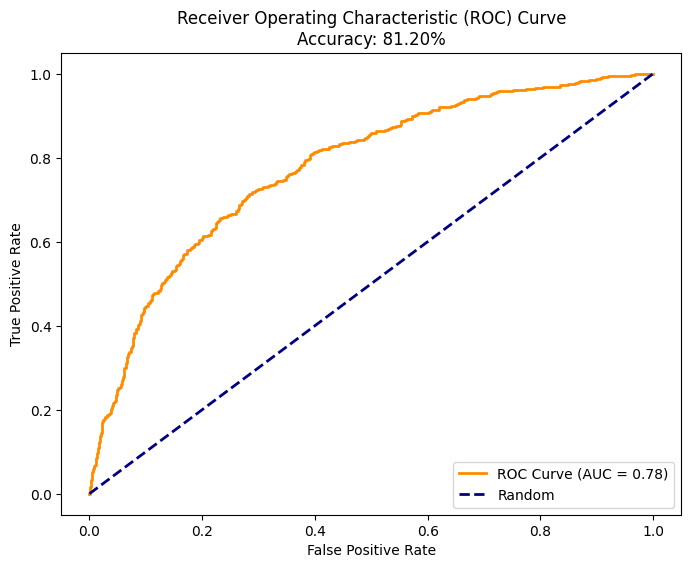

In [59]:
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_prob = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	accuracy * 100))
plt.legend(loc="lower right")
plt.show()
